## Unsupervised Learning

Instructor: Aldo Alducin

Presenta: Juliho Castillo Colmenares


<p><img src="https://cdn.gritglobal.io/uploads/too-broad-customer-segmentation.jpg" width="1000"/></p>

## Segmentacion de Clientes
<p>En esté capitulo nos vamos a enfocar en entender y trabajar un caso de uso para segmentación de clientes, pero antes de eso aquí una pequeña lista de más aplicaciones que se pueden trabajar con los datos recopliados de mis clientes

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del Cliente a traves del tiempo (CTLV)

La segmentación la vamos a hacer con base en una metodolgía llamada <b>RFM</b>

</p>

In [127]:
# Importa Pandas, Numpy, Seaborn y Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importa el archivo "Online Retail.csv"
df = pd.read_csv("M30 Online Retail.csv", encoding = "ISO-8859-1")
df.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


In [128]:
# Análisis Exploratorio
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [129]:
# Convert the INVOICE_DATE column to datetime
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format='%d/%m/%Y %H:%M')

# Verify the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   INVOICE_NO    541909 non-null  object        
 1   STOCK_CODE    541909 non-null  object        
 2   DESCRIPTION   540455 non-null  object        
 3   QUANTITY      541909 non-null  int64         
 4   INVOICE_DATE  541909 non-null  datetime64[ns]
 5   UNIT_PRICE    541909 non-null  float64       
 6   CUSTOMER_ID   406829 non-null  float64       
 7   REGION        541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [130]:
# Hay un porcentaje muy alto de valores nulos en la columna "CUSTOMER_ID"
print(df['CUSTOMER_ID'].isna().sum()/df.shape[0] * 100, '%')

24.926694334288598 %


In [131]:
df['CUSTOMER_ID'].min()

np.float64(12346.0)

In [132]:
df['CUSTOMER_ID']=df['CUSTOMER_ID'].fillna(-1)
df['CUSTOMER_ID'].isna().sum()

np.int64(0)

In [133]:
df['CUSTOMER_ID'].max()

np.float64(18287.0)

In [134]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype(np.int32)
df['CUSTOMER_ID'].dtype

dtype('int32')

In [135]:
categorical_cols = ['INVOICE_NO', 'STOCK_CODE', 'CUSTOMER_ID', 'REGION']

# Convert the CUSTOMER_ID column to a categorical type
df[categorical_cols] = df[categorical_cols].astype('category')

# Verify the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   INVOICE_NO    541909 non-null  category      
 1   STOCK_CODE    541909 non-null  category      
 2   DESCRIPTION   540455 non-null  object        
 3   QUANTITY      541909 non-null  int64         
 4   INVOICE_DATE  541909 non-null  datetime64[ns]
 5   UNIT_PRICE    541909 non-null  float64       
 6   CUSTOMER_ID   541909 non-null  category      
 7   REGION        541909 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 21.6+ MB


In [136]:
df['DESCRIPTION'] = df['DESCRIPTION'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   INVOICE_NO    541909 non-null  category      
 1   STOCK_CODE    541909 non-null  category      
 2   DESCRIPTION   541909 non-null  object        
 3   QUANTITY      541909 non-null  int64         
 4   INVOICE_DATE  541909 non-null  datetime64[ns]
 5   UNIT_PRICE    541909 non-null  float64       
 6   CUSTOMER_ID   541909 non-null  category      
 7   REGION        541909 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 21.6+ MB


In [137]:
df.describe()

,QUANTITY,INVOICE_DATE,UNIT_PRICE
count,541909.000000,541909,541909.000000
mean,9.552250,2020-07-04 08:55:02.927097344,4.611114
min,-80995.000000,2019-12-01 08:26:00,-11062.060000
25%,1.000000,2020-03-28 11:34:00,1.250000
50%,3.000000,2020-07-19 17:17:00,2.080000
75%,10.000000,2020-10-19 11:27:00,4.130000
max,80995.000000,2020-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [138]:
# Existen valores negativos en la columna QUANTITY, 
# pero debido al número de registros, no se eliminarán
# Es posible que se trate de devoluciones
df[df['QUANTITY'] < 0]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
141,C536379,D,Discount,-1,2019-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2019-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2020-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2020-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2020-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2020-12-09 11:58:00,1.25,17315,United Kingdom


In [139]:
df.describe(include=['category'])

,INVOICE_NO,STOCK_CODE,CUSTOMER_ID,REGION
count,541909,541909,541909,541909
unique,25900,4070,4373,38
top,573585,85123A,-1,United Kingdom
freq,1114,2313,135080,495478


In [140]:
# Existen valores negativos en la columna UNIT_PRICE,
# pero es posible que se traten de ajustes contables
# por lo que no se eliminarán
df[df['UNIT_PRICE'] < 0]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
299983,A563186,B,Adjust bad debt,1,2020-08-12 14:51:00,-11062.06,-1,United Kingdom
299984,A563187,B,Adjust bad debt,1,2020-08-12 14:52:00,-11062.06,-1,United Kingdom


In [141]:
# Eliminaremos los registros con CUSTOMER_ID = -1, es decir, que son nulos
# ya que no tenemos manera de agruparlos por cliente
df = df[df['CUSTOMER_ID']!=-1]

## Recency
<p>Indicador que nos dice que tan reciente es la compra de un cliente</p>

In [142]:
# Obtener los clientes unicos
customer = df.groupby('CUSTOMER_ID', observed=True).agg(Count=('INVOICE_NO', 'count'))  
customer

,Count
CUSTOMER_ID,
12346,2
12347,182
12348,31
12349,73
12350,17
...,...
18280,10
18281,7
18282,13


In [143]:
# Obtener la última fecha de compra por cliente
max_purchase = df.groupby('CUSTOMER_ID', observed=True).agg(MaxPurchaseDate=('INVOICE_DATE', 'max'))
max_purchase.head()

,MaxPurchaseDate
CUSTOMER_ID,
12346,2020-01-18 10:17:00
12347,2020-12-07 15:52:00
12348,2020-09-25 13:13:00
12349,2020-11-21 09:51:00
12350,2020-02-02 16:01:00


In [144]:
# Vamos a calcular nuestra metrica de Recency, esto lo haremos restando los días de la última fecha de compra a cada observacón
max_purchase['RECENCY'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days
max_purchase

,MaxPurchaseDate,RECENCY
CUSTOMER_ID,,
12346,2020-01-18 10:17:00,326
12347,2020-12-07 15:52:00,1
12348,2020-09-25 13:13:00,74
12349,2020-11-21 09:51:00,18
12350,2020-02-02 16:01:00,310
...,...,...
18280,2020-03-07 09:52:00,277
18281,2020-06-12 10:53:00,180
18282,2020-12-02 11:43:00,7


In [145]:
# Unir el DataFrame de clientes únicos con el que acabamos de crear de la última fecha de compra
customer = customer.merge(max_purchase, on='CUSTOMER_ID')
customer.head()

,Count,MaxPurchaseDate,RECENCY
CUSTOMER_ID,,,
12346,2,2020-01-18 10:17:00,326
12347,182,2020-12-07 15:52:00,1
12348,31,2020-09-25 13:13:00,74
12349,73,2020-11-21 09:51:00,18
12350,17,2020-02-02 16:01:00,310


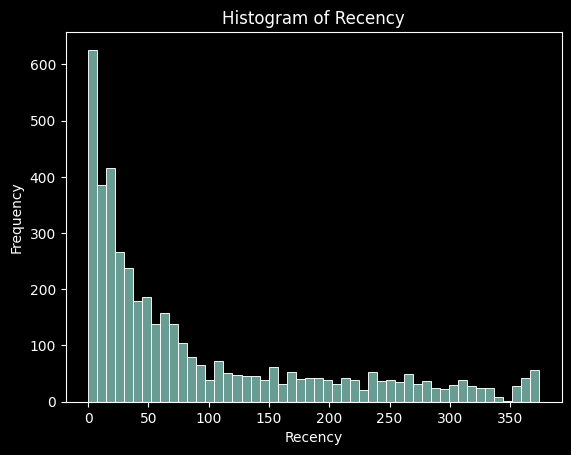

In [146]:
# Grafica un histograma de Recency
sns.histplot(max_purchase['RECENCY'], bins = 50)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Histogram of Recency')
plt.show()

In [147]:
# Imprime la Estadística de Resumen para Recency
max_purchase['RECENCY'].describe()

count    4372.000000
mean       91.123056
std       100.946554
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       374.000000
Name: RECENCY, dtype: float64

## Frequency
<p>Frecuencia con la que un cliente compra uno o más productos</p>

In [148]:
# Obtener el número de compras por cliente
frequency = df.groupby('CUSTOMER_ID', observed= True).agg(FREQUENCY=('INVOICE_NO', 'nunique'))
frequency

,FREQUENCY
CUSTOMER_ID,
12346,2
12347,7
12348,4
12349,1
12350,1
...,...
18280,1
18281,1
18282,3


In [149]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = customer.merge(frequency, on = 'CUSTOMER_ID')
customer.head()

,Count,MaxPurchaseDate,RECENCY,FREQUENCY
CUSTOMER_ID,,,,
12346,2,2020-01-18 10:17:00,326,2
12347,182,2020-12-07 15:52:00,1,7
12348,31,2020-09-25 13:13:00,74,4
12349,73,2020-11-21 09:51:00,18,1
12350,17,2020-02-02 16:01:00,310,1


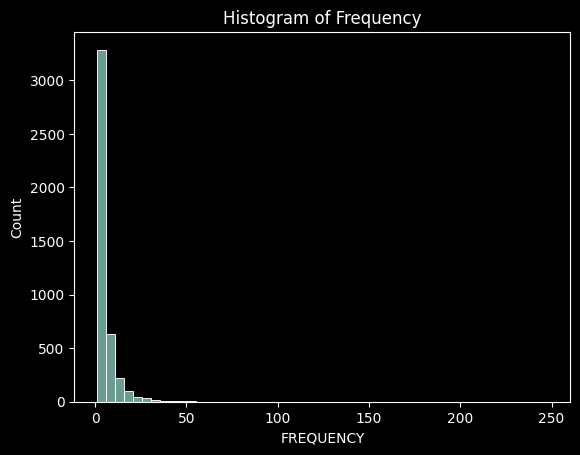

In [150]:
# Grafica un histograma de Frequency 
sns.histplot(customer['FREQUENCY'], bins = 50)
plt.xlabel('FREQUENCY')
plt.title('Histogram of Frequency')
plt.show()  


In [151]:
# Imprime la Estadística de Resumen para FREQUENCY
customer['FREQUENCY'].describe()

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: FREQUENCY, dtype: float64

## Monetary
<p>Valor del monto total que ha gastado un cliente en la compra de mis productos</p>

In [152]:
# Calcular el monto total por cada compra
df['MONETARY'] = df['QUANTITY'] * df['UNIT_PRICE']
df.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,MONETARY
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [153]:

# Obtener el valor monetario de compra por cliente
monetary = df.groupby('CUSTOMER_ID', observed=True).agg(MONETARY=('MONETARY', 'sum'))
monetary

,MONETARY
CUSTOMER_ID,
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,176.60


In [154]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = customer.merge(monetary, on='CUSTOMER_ID')
customer.head()

,Count,MaxPurchaseDate,RECENCY,FREQUENCY,MONETARY
CUSTOMER_ID,,,,,
12346,2,2020-01-18 10:17:00,326,2,0.00
12347,182,2020-12-07 15:52:00,1,7,4310.00
12348,31,2020-09-25 13:13:00,74,4,1797.24
12349,73,2020-11-21 09:51:00,18,1,1757.55
12350,17,2020-02-02 16:01:00,310,1,334.40


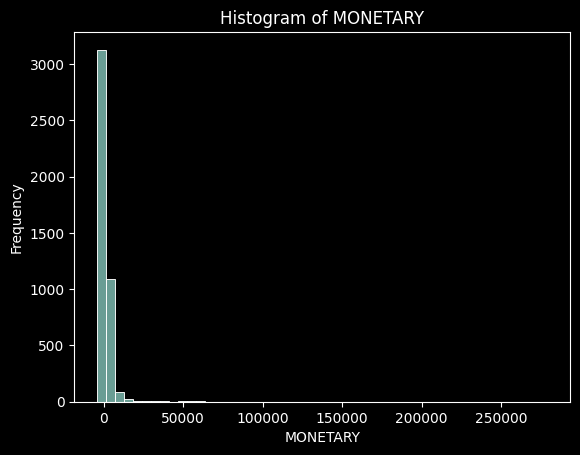

In [155]:
# Grafica un histograma de Monetary
sns.histplot(customer['MONETARY'], bins = 50)
plt.xlabel('MONETARY')
plt.ylabel('Frequency')
plt.title('Histogram of MONETARY')
plt.show()

In [156]:
# Imprime la Estadística de Resumen para Monetary
customer['MONETARY'].describe()

count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: MONETARY, dtype: float64

## Algoritmo k-Means
<p>Ya creamos nuestros indicadores principales de la metodología RFM. es hora de hacer <i>Machine Learning</i>. Para ello utilizaremos un algoritmo no supervisado llamado <b>k-Means</b></p>
<p><img src="https://miro.medium.com/max/818/1*fG8u8nV7qR91wDyFDEEV-g.png" width="250"/></p>

In [157]:
# Funcion para ordenar los clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

## Elbow Method
<p>¿Cual es mi número óptimo de clusters? Vamos a contruir una <i>gráfica de codo</i> para averiguarlo</p>

In [158]:
# Importa la librería de kMeans
from sklearn.cluster import KMeans
import warnings

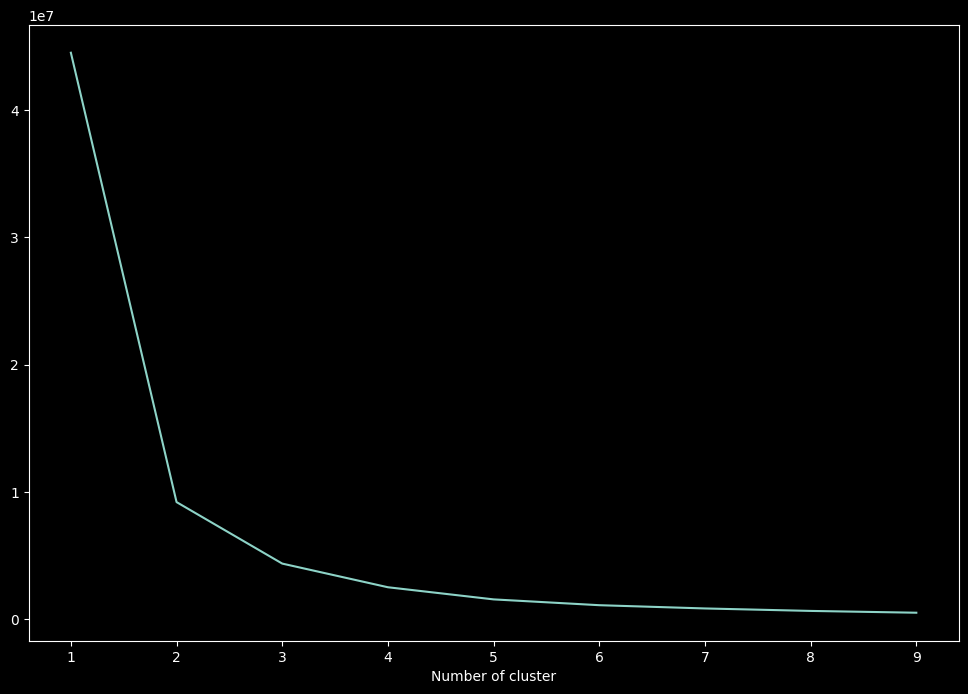

In [159]:
# Configuración inicial - Vamos a tomar como referencia el indicador de Recency
warnings.filterwarnings('ignore')
sse={}
recency = customer[['RECENCY']]

for k in range(1, 10):
    # Instancia el algoritmo de k-means iterando sobre k
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    
    # Entrena el algoritmo
    kmeans.fit(recency)
    
    # Adjunta las etiquetas
    recency["clusters"] = kmeans.labels_
    
    # Adunta la inercia o variación al arreglo sse
    sse[k] = kmeans.inertia_
    
# Grafico de codo (Elbow)
plt.figure(figsize=(12,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [160]:
# Instanciar el algoritmo con 4 clusters para Recency 
kmeans = KMeans(n_clusters=4)

# Entrenar el algoritmo
kmeans.fit(customer[['RECENCY']])

# Obtener las predicciones
customer['RECENCY_CLUSTER'] = kmeans.predict(customer[['RECENCY']])

# Ordenar los clusters
customer = order_cluster('RECENCY_CLUSTER', 'RECENCY', customer, False)

# Estadística Descriptiva del cluster creado
customer.groupby('RECENCY_CLUSTER')['RECENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
RECENCY_CLUSTER,,,,,,,,
0,494.0,310.912955,38.940253,253.0,276.0,308.0,353.00,374.0
1,615.0,192.720325,32.608673,140.0,165.0,190.0,218.00,252.0
2,964.0,84.669087,23.930399,53.0,64.0,78.0,104.25,139.0
3,2299.0,19.423662,15.022921,0.0,7.0,17.0,30.00,52.0


In [161]:
# Instanciar el algoritmo con 4 clusters para FREQUENCY 
kmeans = KMeans(n_clusters=4)

# Entrenar el algoritmo
kmeans.fit(customer[['FREQUENCY']])

# Obtener las predicciones
customer['FREQUENCY_CLUSTER'] = kmeans.predict(customer[['FREQUENCY']])

# Ordenar los clusters
customer = order_cluster('FREQUENCY_CLUSTER', 'FREQUENCY', customer, True)

# Estadística Descriptiva de los clusters
customer.groupby('FREQUENCY_CLUSTER')['FREQUENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
FREQUENCY_CLUSTER,,,,,,,,
0,3913.0,3.086123,2.342807,1.0,1.0,2.0,4.0,10.0
1,417.0,17.213429,6.260377,11.0,12.0,15.0,20.0,38.0
2,39.0,58.846154,22.904307,39.0,43.0,52.0,64.5,128.0
3,3.0,213.666667,40.501029,169.0,196.5,224.0,236.0,248.0


In [162]:
# Instanciar el algoritmo con 4 clusters para MONETARY 
kmeans = KMeans(n_clusters=4)

# Entrenar el algoritmo
kmeans.fit(customer[['MONETARY']])

# Obtener las predicciones
customer['MONETARY_CLUSTER'] = kmeans.predict(customer[['MONETARY']])

# Ordenar los clusters ¿Como tienes que ordenar el cluster?
customer = order_cluster('MONETARY_CLUSTER', 'MONETARY', customer, True)

# Estadística Descriptiva de los clusters
customer.groupby('MONETARY_CLUSTER')['MONETARY'].describe()

,count,mean,std,min,25%,50%,75%,max
MONETARY_CLUSTER,,,,,,,,
0,4332.0,1359.641714,2045.005429,-4287.63,291.0375,640.795,1553.8650,18793.41
1,33.0,37238.807273,14403.896372,19786.44,26763.3400,33350.760,50992.6100,65892.08
2,5.0,129057.952000,36658.292209,88125.38,113384.1400,123725.450,132572.6200,187482.17
3,2.0,267963.755000,16299.186073,256438.49,262201.1225,267963.755,273726.3875,279489.02


## Score de Segmentación
<p>El algoritmo de k-means nos da una segmentación generalizada, pero podemos personalizarla aún más creando una métrica que asigne una calificación al valor del cluster. Esto es lo que vamos a hacer!!</p>

In [163]:
# Vamos a crear nuestro score sumando el valor de cada uno de los clusters
customer['SCORE'] = customer['RECENCY_CLUSTER'] + customer['FREQUENCY_CLUSTER'] + customer['MONETARY_CLUSTER']

# Obtener el promedio para cada una de las métricas de las calificaciones creadas (Score)
customer.groupby('SCORE')[['RECENCY', 'FREQUENCY', 'MONETARY']].mean()


,RECENCY,FREQUENCY,MONETARY
SCORE,,,
0,311.120163,1.425662,331.770407
1,193.304419,2.191489,532.758267
2,85.576236,2.868559,945.175796
3,21.903123,4.082583,1261.840085
4,12.045576,17.243968,5193.833217
5,4.687500,40.343750,21760.863438
6,5.882353,61.235294,45213.001176
7,3.800000,112.000000,91680.914000
8,0.333333,129.000000,222833.376667


In [164]:
# Crea una funcion que asigne lo siguiente: 
# Si score <= 1 entonces 'Low-Value', si score >1 y <=4 entonces 'Average', si score >4 y <=6 entonces 'Potential', por último si score >6 entonces 'High-Value'
def segment(score):
    if score <= 1:
        return 'Low-Value'
    elif score > 1 and score <= 4:
        return 'Average'
    elif score > 4 and score <= 6:
        return 'Potential'
    else:
        return 'High-Value'


# Crear una columna aplicando esta función al campo 'SCORE'
customer['SEGMENT'] = customer['SCORE'].apply(segment)

In [165]:
# Vamos a dar un vistazo a la tabla final
customer.head()

,Count,MaxPurchaseDate,RECENCY,FREQUENCY,MONETARY,RECENCY_CLUSTER,FREQUENCY_CLUSTER,MONETARY_CLUSTER,SCORE,SEGMENT
0,2,2020-01-18 10:17:00,326,2,0.00,0,0,0,0,Low-Value
1,182,2020-12-07 15:52:00,1,7,4310.00,3,0,0,3,Average
2,31,2020-09-25 13:13:00,74,4,1797.24,2,0,0,2,Average
3,73,2020-11-21 09:51:00,18,1,1757.55,3,0,0,3,Average
4,17,2020-02-02 16:01:00,310,1,334.40,0,0,0,0,Low-Value


In [166]:
# Imprime la proporción o el total de clientes por segmento
customer['SEGMENT'].value_counts(normalize=True)

SEGMENT
Average       0.734904
Low-Value     0.252059
Potential     0.011208
High-Value    0.001830
Name: proportion, dtype: float64

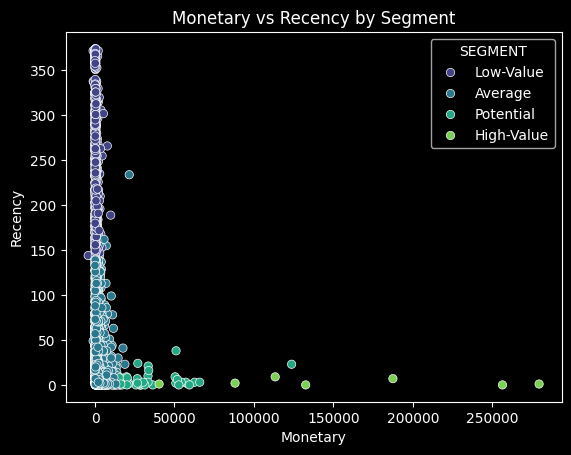

In [167]:
# Define un estilo 'bmh'
# plt.style.use('bmh')
# Debido a la forma que mi IDE renderiza los gráficos, al utilizar el estilo 'bmh'
# las etiquetas no se visualizan correctamente, por lo que se utilizará el estilo por defecto

# Filtra los valores para RECENCY < 4000
customer = customer[customer['RECENCY'] < 4000]

# Crea un grafico de dispersion de 'MONETARY' VS 'RECENCY' por Segmento
sns.scatterplot(data=customer, x='MONETARY', y='RECENCY', hue='SEGMENT', palette='viridis')
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.title('Monetary vs Recency by Segment')
plt.show()

Para los segmentos Low-Value y Average, el valor de las compras por cliente parece ser muy bajo, y el tiempo que ha paso desde la última compra es indiferente. En cambio, para los segmentos más altos, es claro que tienen a comprar más seguido. 

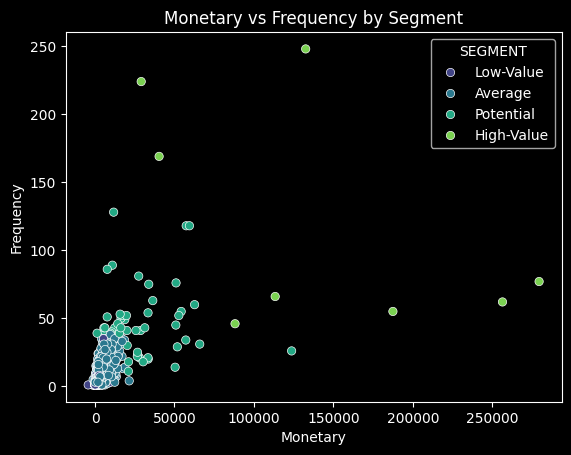

In [168]:
# Crea un grafico de dispersion de 'MONETARY' vs 'FREQUENCY' vs  por Segmento
sns.scatterplot(data=customer, x='MONETARY', y='FREQUENCY', hue='SEGMENT', palette='viridis')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary vs Frequency by Segment')
plt.show()

Para los dos segmentos más bajos, parece que el valor de las comprar y la frecuencia no esta muy correlacionado, pero para los segmentos más altos, hay una correlación inversa entre el valor de las compras y la frecuencia, es decir, los clientes que compran más seguido, gastan menos en cada compra.